#### Criteria for creating nodes and edges:

### Nodes and attributes:
## Attributes: contains the gender of the character (gnere_dict in script.py).

### Edges types:

## 1. Co-appearences: Characters which co-appears together in the scene. The weight of the edge is the number of how many times the couples co-appear together. (co/co-appereances.py).

## 2. Interactions: Most important dialogues for the plot I made a list of the couples which interact and how many times they interact, which indicates the weight of the edge as well (interactions/interactions.py).

## 3. Relationships: Family, love instrest, friendships between characters. 

In [12]:
import pandas as pd
import networkx as nx
import json


# Load the character pairs and their counts from the CSV file
result_df = pd.read_csv('co/character_pairs_counts.csv')


characters_list = ['Hamlet', 'King Claudius', 'Queen Gertrude', 'Horatio', 'Polonius', 'Laertes', 'Ophelia', 'Bernardo', 'Francisco', 'Marcellus', 'Ghost', 'King Fortinbras', 'Voltimand', 'Lords', 'Attendants', 'Rosencrantz', 'Guildenstern', 'Ambassadors from Norway', 'Players', 'First Player', 'Reynaldo', 'Lucianus', 'Player King', 'Player Queen', 'Prince Fortinbras', 'Captain', 'Gentlemen', 'Servant', 'First Sailor', 'First Clown', 'Second Clown', 'Priest', 'First Ambassador', 'Osric', 'A Lord', 'Cornelius', 'Messenger', 'Fortinbras']

# Dizionario
genere_dict = {
    'Hamlet': 'Male',
    'King Claudius': 'Male',
    'Queen Gertrude' : 'Female',
    'Horatio': 'Male',
    'Polonius': 'Male',
    'Laertes': 'Male',
    'Ophelia': 'Female',
    'Bernardo': 'Male',
    'Francisco': 'Male',
    'Marcellus': 'Male',
    'Ghost': 'Male',
    'King Fortinbras': 'Male',
    'Voltimand': 'Male',
    'Lords': 'Male',
    'Attendants': 'Male',
    'Rosencrantz': 'Male',
    'Guildenstern': 'Male',
    'Ambassadors from Norway': 'Male',
    'Players': 'Male',
    'First Player': 'Male',
    'Reynaldo': 'Male',
    'Lucianus': 'Male',
    'Player King': 'Male',
    'Player Queen': 'Male', 
    'Prince Fortinbras': 'Male', 
    'Captain': 'Male', 
    'Gentlemen': 'Male',
    'Servant': 'Male',
    'First Sailor': 'Male',
    'First Clown': 'Male',
    'Second Clown': 'Male', 
    'Priest': 'Male',
    'First Ambassador': 'Male',
    'Osric': 'Male',
    'A Lord': 'Male',
    'Cornelius': 'Male',
    'Messenger': 'Male',
    'Fortinbras': 'Male',

}
# Create a directed graph
G = nx.DiGraph()

# Add nodes with gender information
for character, gender in genere_dict.items():
    G.add_node(character, gender=gender)


#----------CO-APPEARENCE
# Add edges with weights based on co-appearances
for _, row in result_df.iterrows():
    character_pair = eval(row['Character Pair'])  # Convert string representation to tuple
    weight = row['Count']
    G.add_edge(character_pair[0], character_pair[1], weight=weight)

    
# Specify the path where you want to save the Gephi file
gephi_file_path = 'graph/draft.gexf'

# Write the graph to a Gephi file
nx.write_gexf(G, gephi_file_path)

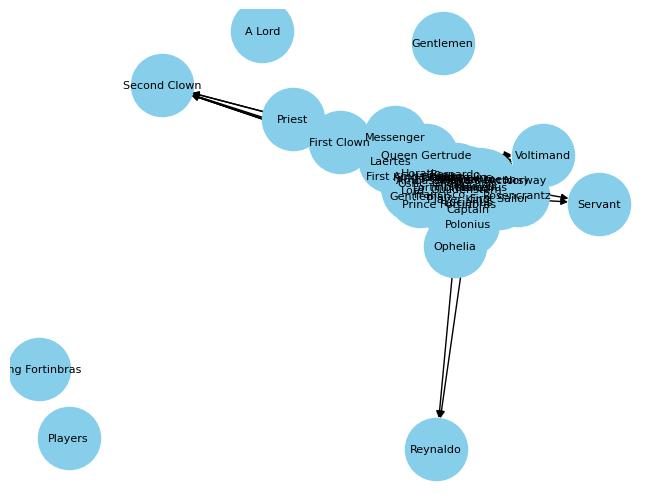

In [13]:
# Carica il grafo da un file GEXF
file_gexf = 'graph/draft.gexf'
G = nx.read_gexf(file_gexf)

# Nodi da rimuovere
nodes_to_remove = ["Voltemand", "Queen Margaret"]

# Rimuovi i nodi dal grafo
G.remove_nodes_from(nodes_to_remove)

# Salva il grafo modificato in un nuovo file GEXF
file_gexf_modificato = 'graph/no_colors.gexf'
nx.write_gexf(G, 'graph/no_colors.gexf')

In [16]:
#---------INTERACTIONS-------


# Load the interactions data from the CSV file
interactions_df = pd.read_csv('interactions/interactions.csv')

# Add edges with weights based on interactions
for _, row in interactions_df.iterrows():
    character1 = row['Character1']
    character2 = row['Character2']
    weight = row['Number of Interactions']
    
     # Check if the nodes exist in the graph
    if G.has_node(character1) and G.has_node(character2):
        # Check if the edge already exists
        if G.has_edge(character1, character2):
            # If the edge already exists, add a new attribute for interaction weight
            G[character1][character2]['interaction_weight'] = int(weight)
        else:
            # If the edge doesn't exist, add a new edge with a different attribute for interaction weight
            G.add_edge(character1, character2, interaction_weight=int(weight))
    else:
        print(f"Nodes {character1} or {character2} do not exist in the graph.")

Nodes The Servant or Horatio do not exist in the graph.
Nodes Clowns or Clowns do not exist in the graph.
Nodes Hamlet or Clowns do not exist in the graph.


In [17]:
#------RELATIONSHIPS-----------
# Load relationships from JSON file
# Load the relationships data from the CSV file
relationships_df = pd.read_csv('relationships/relationships.csv')

# Add edges with labels based on relationships
for _, row in relationships_df.iterrows():
    character1 = row['Character']
    relationship_type = row['Type of Relationship']
    with_of = row['With/Of']

    # Check if the nodes exist in the graph
    if G.has_node(character1) and G.has_node(with_of):
        # Add edge with label
        G.add_edge(character1, with_of, relationship=relationship_type)

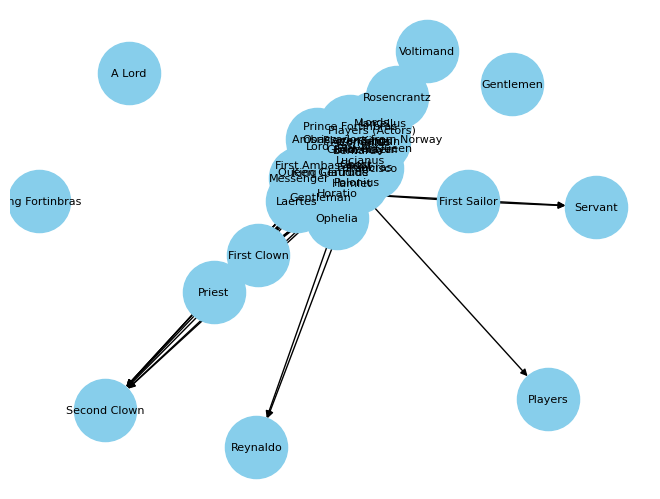

In [18]:
import matplotlib.pyplot as plt

# Set node positions for better visualization
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, font_size=8, node_size=2000, node_color='skyblue', arrowsize=10)

# Show the plot
plt.show()